In [2]:
import numpy as np

import import_ipynb



from L_layer_deeplearning import L_layer_model, graph, L_model_forward,initialize_parameters_deep
np.random.seed(1)

In [3]:
params = initialize_parameters_deep([12288, 20, 7, 5, 1])
print("W1[0,:5] =", params['W1'][0, :5])

W1[0,:5] = [ 0.02072301 -0.00780464 -0.00673829 -0.01368868  0.01104066]


In [4]:
import h5py

def load_data():
    
    train_dataset = h5py.File('train_catvsnoncat.h5', "r")
    test_dataset = h5py.File('test_catvsnoncat.h5', "r")

    X_train = np.array(train_dataset["train_set_x"])  # (209, 64, 64, 3)
    y_train = np.array(train_dataset["train_set_y"])  # (209,)

    X_test = np.array(test_dataset["test_set_x"])     # (50, 64, 64, 3)
    y_test = np.array(test_dataset["test_set_y"])     # (50,)

    num_examples = X_train.shape[0]
    feature_size = X_train.shape[1] * X_train.shape[2] * X_train.shape[3] 

    # Flatten and normalize
    X = X_train.reshape(feature_size, num_examples) / 255.0 # (12288, 209)

    #shortcut:
    X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0     # (12288, 50)
    Y = y_train.reshape(1, -1)  # (1, 209)
    y_test = y_test.reshape(1, -1)    # (1, 50)

    train_dataset.close()

    return X, Y, X_test, y_test

In [5]:
X, Y, X_test, y_test = load_data()
print(X.shape)
print(Y.shape)
input_layer = X.shape[0]

(12288, 209)
(1, 209)


In [5]:
predictions, _ = L_model_forward(X_test, params)
predictions = (predictions > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)

print(f"Accuracy of train set: {accuracy * 100:.2f}%")

#this is a test to see how easily i can type on pc from laptop

Accuracy of train set: 66.00%


In [6]:
#all relu activation besides final layer
layers_dims = [12288, 20, 7, 5, 1]
#layers_dims = [12288, 7, 1]

parameters, costs = L_layer_model(X, Y, layers_dims, learning_rate = 0.001, num_iterations = 3000, print_cost=True, lambd = 0.1)

Cost after iteration 0: 0.7601266029413812
Cost after iteration 100: 0.7070509162570622
Cost after iteration 200: 0.7010685662914967
Cost after iteration 300: 0.6963039284813
Cost after iteration 400: 0.6899858741435575
Cost after iteration 500: 0.6813696528560138
Cost after iteration 600: 0.6635124157243505
Cost after iteration 700: 0.650189122743606
Cost after iteration 800: 0.6423638568550202
Cost after iteration 900: 0.6364028300008385
Cost after iteration 1000: 0.6313538747703606
Cost after iteration 1100: 0.6259841052160119
Cost after iteration 1200: 0.6203791927306367
Cost after iteration 1300: 0.6156006557816315
Cost after iteration 1400: 0.6110894824924037
Cost after iteration 1500: 0.6067908944559084
Cost after iteration 1600: 0.6026457223135053
Cost after iteration 1700: 0.5986757957571464
Cost after iteration 1800: 0.5947777083893931
Cost after iteration 1900: 0.5905298317011297
Cost after iteration 2000: 0.5861480802842368
Cost after iteration 2100: 0.5818677382671107
Cost

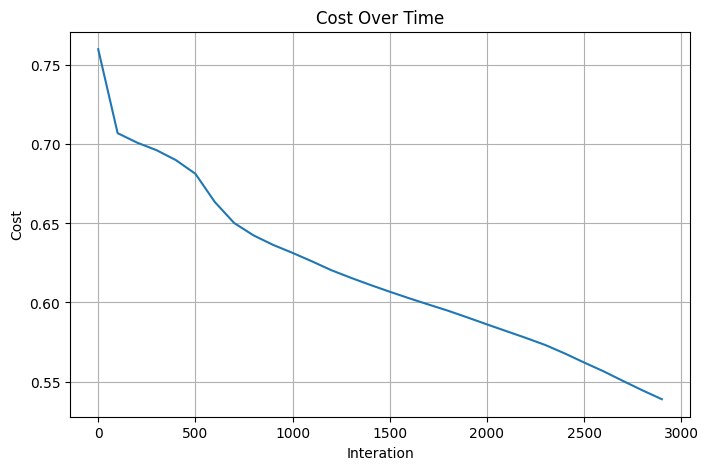

In [7]:
graph(costs)

In [8]:
predictions, _ = L_model_forward(X, parameters)
predictions = (predictions > 0.5).astype(int)
accuracy = np.mean(predictions == Y)

print(f"Accuracy of train set: {accuracy * 100:.2f}%")

Accuracy of train set: 75.60%


In [9]:
predictions, _ = L_model_forward(X_test, parameters)
predictions = (predictions > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)

print(f"Accuracy of train set: {accuracy * 100:.2f}%")

Accuracy of train set: 34.00%


In [ ]:
index = np.random.randint(0, 49) # from 0 to 49
image = X_test[:, index].reshape((64, 64, 3)) * 255  # reshape and un-normalize
label = y_test[0, index]

prediction, _ = L_model_forward(X_test[:, index].reshape(-1, 1), parameters)  # shape: (12288, 1)
print(prediction.shape)
prediction = (prediction > 0.5).astype(int)

print("Predicted:", "Cat" if prediction == 1 else "Not a cat")
print("Actual:", "Cat" if label == 1 else "Not a cat")

import matplotlib.pyplot as plt

plt.imshow(image.astype(np.uint8))
plt.title(f"Predicted: {'Cat' if prediction == 1 else 'Not a cat'}\n"
          f"Actual: {'Cat' if label == 1 else 'Not a cat'}")
plt.axis("off")
plt.show()



In [ ]:
import L_layer_deeplearning